In [277]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/list-of-best-selling-ps4-games/List of best-selling PlayStation 4 video games.csv


In [278]:
import matplotlib.pyplot as plt
import seaborn as sns

In [279]:
df=pd.read_csv("/kaggle/input/list-of-best-selling-ps4-games/List of best-selling PlayStation 4 video games.csv")

In [280]:
df.head(10)

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20 million,"September 7, 2018",Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19.5 million,"April 20, 2018",Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16 million,"May 10, 2016",Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10.8 million,"May 18, 2015",Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10 million,"June 19, 2020",Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment
5,Horizon Zero Dawn,10 million,"February 28, 2017",Action role-playing,Guerrilla Games,Sony Interactive Entertainment
6,The Last of Us Remastered,10 million,"July 29, 2014",Action-adventure survival horror,Naughty Dog,Sony Computer Entertainment
7,Ghost of Tsushima,9.73 million,"July 17, 2020",Action-adventure stealth,Sucker Punch Productions,Sony Interactive Entertainment
8,Star Wars Battlefront,8.42 million,"November 17, 2015",First-person shooter third-person shooter,EA DICE,Electronic Arts
9,Gran Turismo Sport,8 million,"October 17, 2017",Racing,Polyphony Digital,Sony Interactive Entertainment


In [281]:
df.describe()

,Game,Copies sold,Release date[a],Genre(s),Developer(s),Publisher(s)
count,33,33,33,33,33,33
unique,33,24,32,15,23,12
top,Marvel's Spider-Man,2 million,"November 15, 2013",Action role-playing,Square Enix,Sony Interactive Entertainment
freq,1,4,2,11,4,8


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Game             33 non-null     object
 1   Copies sold      33 non-null     object
 2   Release date[a]  33 non-null     object
 3   Genre(s)         33 non-null     object
 4   Developer(s)     33 non-null     object
 5   Publisher(s)     33 non-null     object
dtypes: object(6)
memory usage: 1.7+ KB


In [283]:
#Update Copies Sold to float
df['Copies sold'] = df['Copies sold'].str.replace(' million', '').astype(float)

In [284]:
# changing dtype of Release date[a]
df['Release date[a]'] = df['Release date[a]'].astype('datetime64')

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Game             33 non-null     object        
 1   Copies sold      33 non-null     float64       
 2   Release date[a]  33 non-null     datetime64[ns]
 3   Genre(s)         33 non-null     object        
 4   Developer(s)     33 non-null     object        
 5   Publisher(s)     33 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 1.7+ KB


In [286]:
#Rename the existing DataFrame and rename column
df.rename(columns={"Copies sold": "Copies Sold (Millions)"}, inplace=True)

In [287]:
df.head(10)

,Game,Copies Sold (Millions),Release date[a],Genre(s),Developer(s),Publisher(s)
0,Marvel's Spider-Man,20.00,2018-09-07,Action-adventure,Insomniac Games,Sony Interactive Entertainment
1,God of War,19.50,2018-04-20,Action-adventure hack and slash,Santa Monica Studio,Sony Interactive Entertainment
2,Uncharted 4: A Thief's End,16.00,2016-05-10,Action-adventure,Naughty Dog,Sony Interactive Entertainment
3,The Witcher 3: Wild Hunt,10.80,2015-05-18,Action role-playing,CD Projekt Red,CD Projekt
4,The Last of Us Part II,10.00,2020-06-19,Action-adventure survival horror,Naughty Dog,Sony Interactive Entertainment
5,Horizon Zero Dawn,10.00,2017-02-28,Action role-playing,Guerrilla Games,Sony Interactive Entertainment
6,The Last of Us Remastered,10.00,2014-07-29,Action-adventure survival horror,Naughty Dog,Sony Computer Entertainment
7,Ghost of Tsushima,9.73,2020-07-17,Action-adventure stealth,Sucker Punch Productions,Sony Interactive Entertainment
8,Star Wars Battlefront,8.42,2015-11-17,First-person shooter third-person shooter,EA DICE,Electronic Arts
9,Gran Turismo Sport,8.00,2017-10-17,Racing,Polyphony Digital,Sony Interactive Entertainment


In [288]:
df.isnull()

,Game,Copies Sold (Millions),Release date[a],Genre(s),Developer(s),Publisher(s)
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [289]:
df.describe()

,Copies Sold (Millions)
count,33.000000
mean,5.445152
std,5.291126
min,1.000000
25%,2.000000
50%,2.500000
75%,8.420000
max,20.000000


In [290]:
# Copies Sold By Publisher
publisher_copies_sold = df.groupby('Publisher(s)')["Copies Sold (Millions)"].sum()
print(publisher_copies_sold)

Publisher(s)
Activision                                            2.50
Atlus                                                 2.30
CD Projekt                                           14.63
Capcom                                                4.67
EA Sports                                             3.12
Electronic Arts                                       9.72
Konami                                                1.10
Rockstar Games                                        2.02
Sony Computer Entertainment                          26.10
Sony Interactive Entertainment                       98.73
Square Enix                                          12.40
WW: Sony Interactive Entertainment JP: Koei Tecmo     2.40
Name: Copies Sold (Millions), dtype: float64


In [291]:
df2 = df.groupby('Publisher(s)').agg({'Copies Sold (Millions)': ['sum']})
print(df2)

                                                  Copies Sold (Millions)
                                                                     sum
Publisher(s)                                                            
Activision                                                          2.50
Atlus                                                               2.30
CD Projekt                                                         14.63
Capcom                                                              4.67
EA Sports                                                           3.12
Electronic Arts                                                     9.72
Konami                                                              1.10
Rockstar Games                                                      2.02
Sony Computer Entertainment                                        26.10
Sony Interactive Entertainment                                     98.73
Square Enix                                        

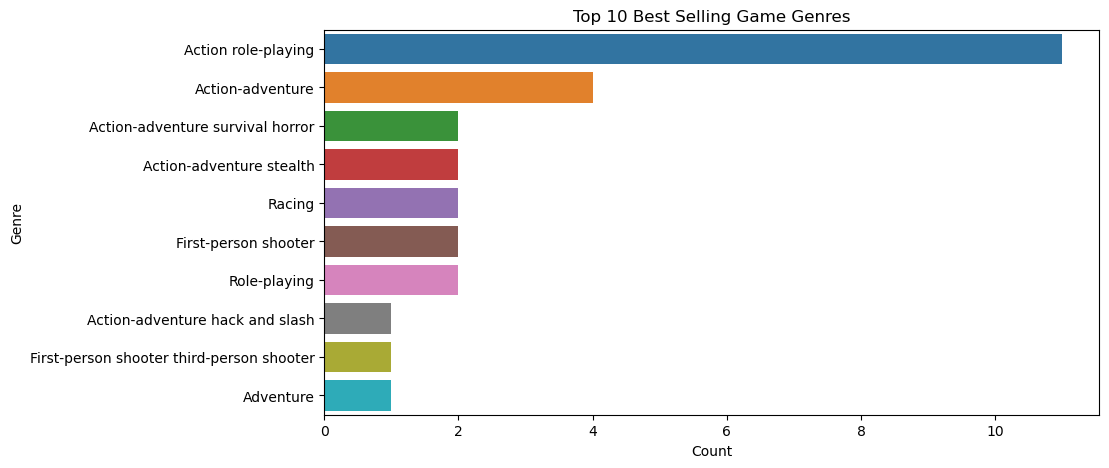

In [292]:
# Most popular genres
plt.figure(figsize=(10,5))
genre_counts = df["Genre(s)"].value_counts().head(10)
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.xlabel("Count")
plt.ylabel("Genre")
plt.title("Top 10 Best Selling Game Genres")
plt.show()

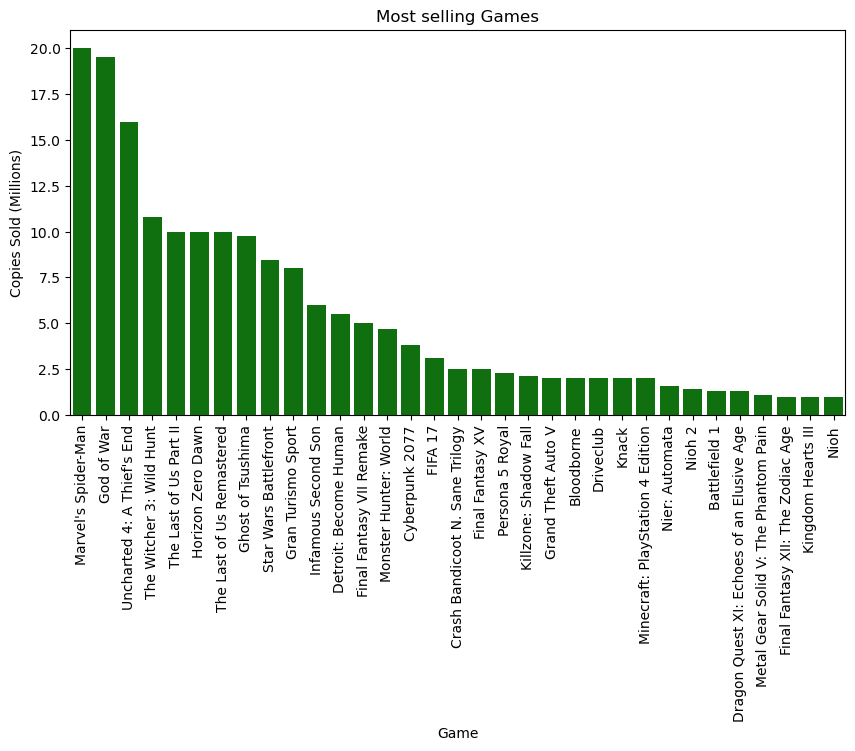

In [293]:
plt.figure(figsize=(10, 5))

a = sns.barplot(x=df['Game'], y=df['Copies Sold (Millions)'], alpha=1, color='green')
a.set_xticklabels(labels=df['Game'], rotation=90)
plt.title('Most selling Games')

plt.show()

Action role-playing                          11
Action-adventure                              4
Action-adventure survival horror              2
Action-adventure stealth                      2
Racing                                        2
First-person shooter                          2
Role-playing                                  2
Action-adventure hack and slash               1
First-person shooter third-person shooter     1
Adventure                                     1
Sports                                        1
Platform                                      1
Role-playing social simulation                1
Platform beat 'em up                          1
Sandbox survival                              1
Name: Genre(s), dtype: int64


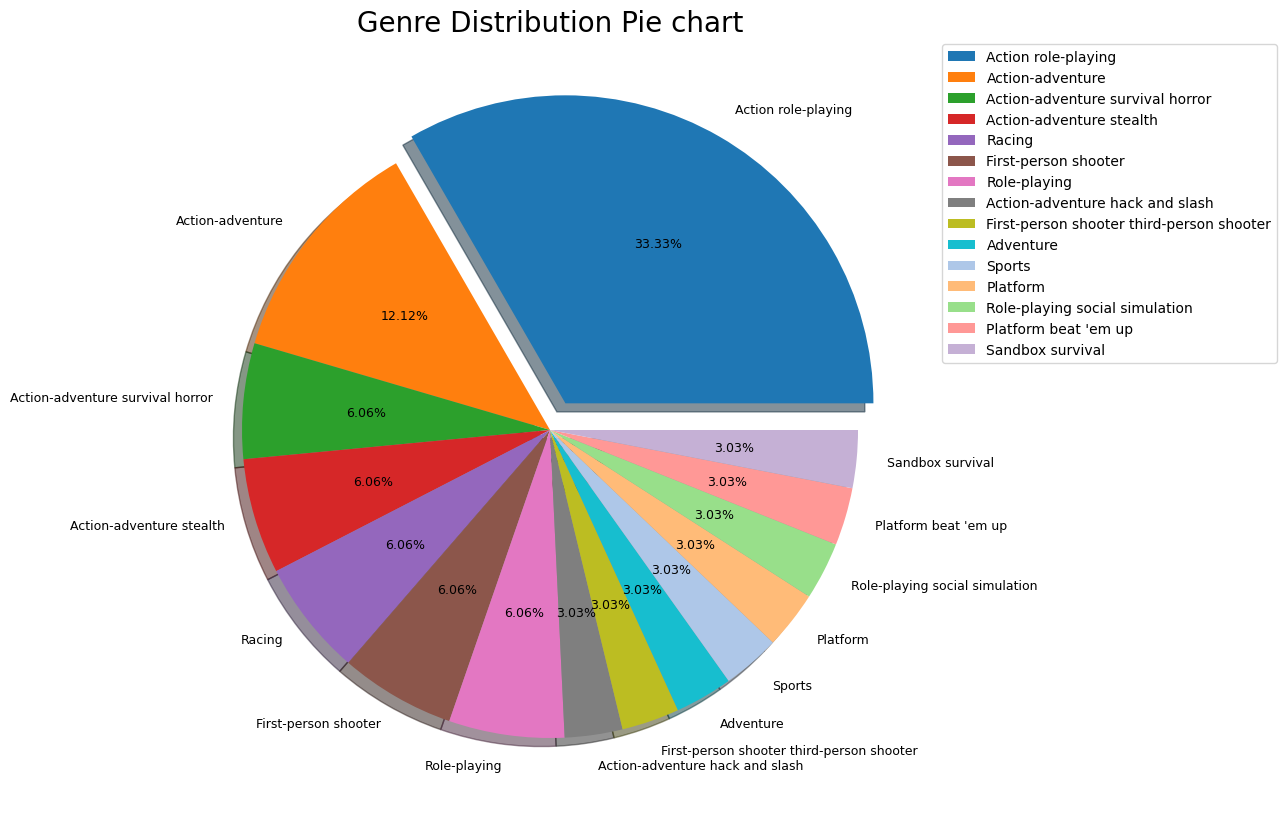

In [294]:
genre_labels = df['Genre(s)'].value_counts()
print(genre_labels)

plt.figure(figsize = (20,10))
explode = [0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
          '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5']
plt.pie(genre_labels, labels=genre_labels.index, autopct='%1.2f%%', textprops={'fontsize':9},shadow =True, explode=explode, colors=colors)
plt.title('Genre Distribution Pie chart', fontdict={"fontsize":20}, pad=10)
plt.legend(bbox_to_anchor=[1,1.01])
plt.show()

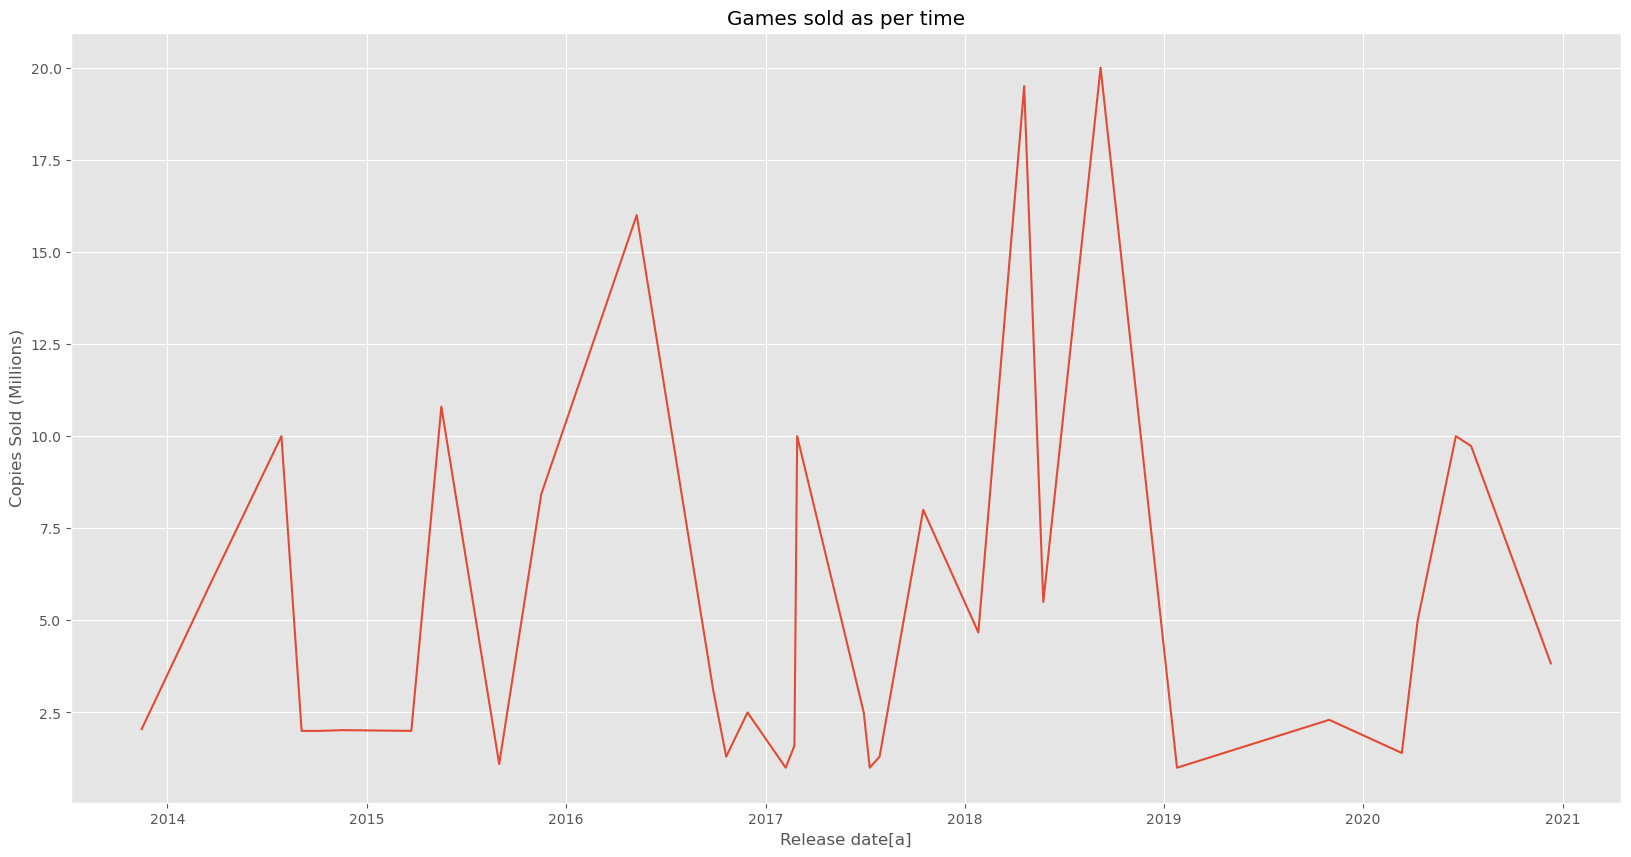

In [310]:
plt.figure(figsize= (20,10))

a = sns.lineplot(x=df['Release date[a]'], y = df['Copies Sold (Millions)'])
plt.title('Games sold as per time')

plt.show()